
# Column description:

### 1. ph: explains the ranges(0 to 14) of pH values but ph of water should be '7'.
### 2. Hardness: The capacity of water to precipitate soap.
### 3. Solids: Total dissolved solids.
### 4. Chloramines: Amount of Chloramines.
### 5. Sulfate: Amount of Sulfates dissolved.
### 6. Conductivity: Electrical conductivity of water.
### 7. Organic_carbon: Amount of organic carbon.
### 8. Trihalomethanes: Amount of Trihalomethanes.
### 9. Turbidity: Measure of light emiting property of water.
### 10. Potability: Indicates if water is safe for human consumption. Potable (-1) and Not potable (-0)

In [39]:
# importing libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split

import seaborn as sns

%matplotlib inline

## Data Exploration

In [4]:
water = pd.read_csv("water_potability.csv")
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
water.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0


In [16]:
water.tail(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


In [6]:
water.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water.shape

(3276, 10)

In [9]:
water.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
water.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
water.fillna(water.mean(),inplace=True)
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
water.nunique()

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

In [18]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [17]:
water.Hardness

0       204.890455
1       129.422921
2       224.236259
3       214.373394
4       181.101509
           ...    
3271    193.681735
3272    193.553212
3273    175.762646
3274    230.603758
3275    195.102299
Name: Hardness, Length: 3276, dtype: float64

In [19]:
water.Potability

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [20]:
water.Conductivity

0       564.308654
1       592.885359
2       418.606213
3       363.266516
4       398.410813
           ...    
3271    526.424171
3272    392.449580
3273    432.044783
3274    402.883113
3275    327.459760
Name: Conductivity, Length: 3276, dtype: float64

In [21]:
water.Organic_carbon

0       10.379783
1       15.180013
2       16.868637
3       18.436524
4       11.558279
          ...    
3271    13.894419
3272    19.903225
3273    11.039070
3274    11.168946
3275    16.140368
Name: Organic_carbon, Length: 3276, dtype: float64

<AxesSubplot:>

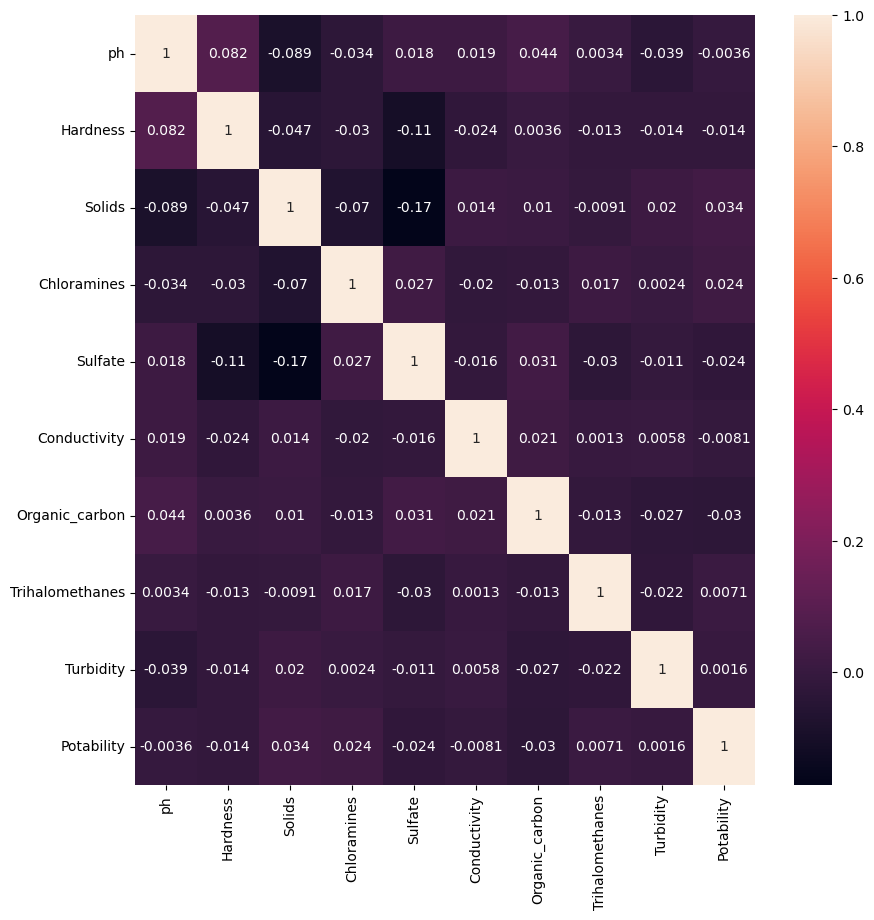

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [22]:
water.max()

ph                    14.000000
Hardness             323.124000
Solids             61227.196008
Chloramines           13.127000
Sulfate              481.030642
Conductivity         753.342620
Organic_carbon        28.300000
Trihalomethanes      124.000000
Turbidity              6.739000
Potability             1.000000
dtype: float64

In [23]:
water.min()

ph                   0.000000
Hardness            47.432000
Solids             320.942611
Chloramines          0.352000
Sulfate            129.000000
Conductivity       181.483754
Organic_carbon       2.200000
Trihalomethanes      0.738000
Turbidity            1.450000
Potability           0.000000
dtype: float64

In [36]:
WATER = water[['ph', 'Organic_carbon', 'Potability']]
print(WATER)

            ph  Organic_carbon  Potability
0     7.080795       10.379783           0
1     3.716080       15.180013           0
2     8.099124       16.868637           0
3     8.316766       18.436524           0
4     9.092223       11.558279           0
...        ...             ...         ...
3271  4.668102       13.894419           1
3272  7.808856       19.903225           1
3273  9.419510       11.039070           1
3274  5.126763       11.168946           1
3275  7.874671       16.140368           1

[3276 rows x 3 columns]


<AxesSubplot:ylabel='Count'>

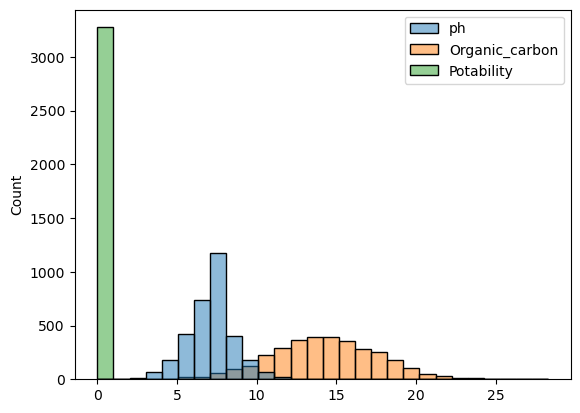

In [30]:
sns.histplot(WATER)